## Семинар 13: "Обучение с подкреплением 1"

###  FrozenLake


<img src="http://vignette2.wikia.nocookie.net/riseoftheguardians/images/4/4c/Jack's_little_sister_on_the_ice.jpg/revision/latest?cb=20141218030206" alt="a random image to attract attention" style="width: 400px;"/>



In [1]:
import gym
import numpy as np 
from time import sleep
from timeit import default_timer as timer

#create a single game instance
env = gym.make("FrozenLake-v0")

#start new game
env.reset();

### legend

![img](https://cdn-images-1.medium.com/max/800/1*MCjDzR-wfMMkS0rPqXSmKw.png)

### Gym interface

The three main methods of an environment are
* __reset()__ - reset environment to initial state, _return first observation_
* __render()__ - show current environment state (a more colorful version :) )
* __step(a)__ - commit action __a__ and return (new observation, reward, is done, info)
 * _new observation_ - an observation right after commiting the action __a__
 * _reward_ - a number representing your reward for commiting action __a__
 * _is done_ - True if the MDP has just finished, False if still in progress
 * _info_ - some auxilary stuff about what just happened. Ignore it for now

### Value iteration algorithm

In [2]:
# run episode 1 time to determine the score for current policy
def run_episode(env, policy, gamma = 1.0, show = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if show:
            env.render()
            sleep(1)
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return [total_reward, step_idx]

In [3]:
# run episode n times to determine mean score of current policy
def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    scores_l = []
    steps_l = []
    for _ in range(n):
        score, steps = run_episode(env, policy, gamma = gamma, show = False)
        scores_l.append(score)
        steps_l.append(steps)
    return [np.mean(scores_l), np.mean(steps_l)]

In [4]:
# extract policy by the given value function. For all states and all actions compute q-functions.
# Take such action to the current state that has the biggest q-value
def extract_policy(v, gamma = 1.0):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    
    return policy

In [5]:
# Value iteration. Computes the value-function for all the states.
def value_iteration(env, gamma=1.0):
    v = np.zeros(env.nS)
    max_iterations = 100000
    eps = 1e-20
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa_list = []
            for a in range(env.nA):
                q_sa = 0
                for ocs in env.P[s][a]:
                    q_sa += ocs[0]*(ocs[2] + gamma*prev_v[ocs[1]])
                q_sa_list.append(q_sa)
            v[s] = max(q_sa_list)
            
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
    return v

In [6]:
start = timer()
value_function_list = value_iteration(env)
optimal_policy = extract_policy(value_function_list)
policy_mean_score, policy_mean_steps = evaluate_policy(env, optimal_policy)
end = timer()
print("Policy mean score: ", policy_mean_score)
print("Policy mean steps: ", policy_mean_steps)
print("Time to converge: ", end-start)

Value-iteration converged at iteration# 1373.
Policy mean score:  0.79
Policy mean steps:  47.72
Time to converge:  0.6150570999999996


###### Results wow effect demonstrating

In [7]:
run_episode(env, optimal_policy, show=True)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG


[1.0, 19]

###### Gamma influence on rewawrds and steps 

In [8]:
gamma_l = np.arange(0.04, 1.02, 0.02)
reward_l = []
steps_l = []
for gamma in gamma_l:
    reward, steps = evaluate_policy(env, optimal_policy, gamma=gamma)
    reward_l.append(reward)
    steps_l.append(steps)

In [9]:
import matplotlib.pyplot as plt

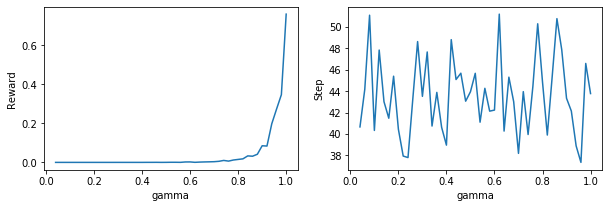

In [10]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(gamma_l, reward_l)
plt.xlabel('gamma')
plt.ylabel('Reward')
plt.subplot(122)
plt.plot(gamma_l, steps_l)
plt.xlabel('gamma')
plt.ylabel('Step')
plt.show()

### Policy iteration algorithm

In [11]:
# run episode 1 time to determine the score for current policy
def run_episode(env, policy, gamma = 1.0, show = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if show:
            env.render()
            sleep(1)
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return [total_reward, step_idx]

In [12]:
# run episode n times to determine mean score of current policy
def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    scores_l = []
    steps_l = []
    for _ in range(n):
        score, steps = run_episode(env, policy, gamma = gamma, show = False)
        scores_l.append(score)
        steps_l.append(steps)
    return [np.mean(scores_l), np.mean(steps_l)]

In [13]:
# Extract policy for given value_function
def extract_policy(v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

In [14]:
#Determine the value-fauction for given policy
def compute_value_function_for_policy(env, policy, gamma=1.0):
    """ Iteratively evaluate the value-function under policy.
    Alternatively, we could formulate a set of linear equations in iterms of v[s] 
    and solve them to find the value function.
    """
    v = np.zeros(env.nS)
    eps = 1e-10
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, _ in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v

In [15]:
#Policy iteratinon. Determine the optimal policy
def policy_iteration(env, gamma = 1.0):
    """ Policy-Iteration algorithm """
    policy = np.random.choice(env.nA, size=(env.nS))  # initialize a random policy
    max_iterations = 200000
    gamma = 1.0
    for i in range(max_iterations):
        old_policy_v = compute_value_function_for_policy(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            print ('Policy-Iteration converged at step %d.' %(i+1))
            break
        policy = new_policy
    return policy

In [16]:
start = timer()
optimal_policy = policy_iteration(env)
policy_mean_score, policy_mean_steps = evaluate_policy(env, optimal_policy)
end = timer()
print("Policy mean score: ", policy_mean_score)
print("Policy mean steps: ", policy_mean_steps)
print("Time to converge: ", end-start)

Policy-Iteration converged at step 7.
Policy mean score:  0.69
Policy mean steps:  47.43
Time to converge:  0.24401489999996784


###### Results wow effect demonstrating

In [17]:
run_episode(env, optimal_policy, show=True)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


[1.0, 31]

###### Gamma influence on rewawrds and steps 

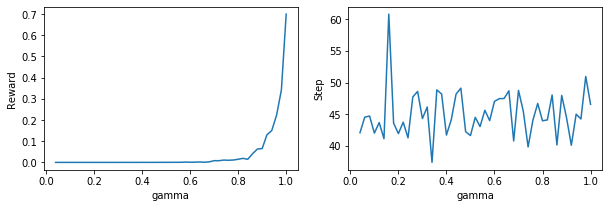

In [18]:
gamma_l = np.arange(0.04, 1.02, 0.02)
reward_l = []
steps_l = []
for gamma in gamma_l:
    reward, steps = evaluate_policy(env, optimal_policy, gamma=gamma)
    reward_l.append(reward)
    steps_l.append(steps)
    
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(gamma_l, reward_l)
plt.xlabel('gamma')
plt.ylabel('Reward')
plt.subplot(122)
plt.plot(gamma_l, steps_l)
plt.xlabel('gamma')
plt.ylabel('Step')
plt.show()

### Conclusion

Policy iteration algorithm time execution is less than value iteration with the same score